In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('segmentation data.csv', index_col='ID')

In [3]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [5]:
df.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [6]:
df['Sex'].value_counts()

0    1086
1     914
Name: Sex, dtype: int64

In [7]:
data_corr = df.corr()

Text(0.5, 1, 'Corelation Heatmap\n')

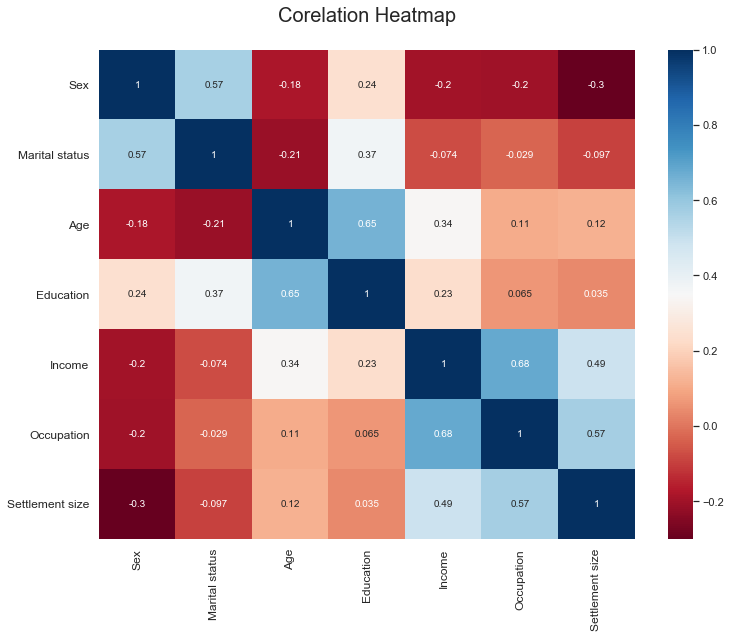

In [8]:
figure = plt.figure(figsize=(12,9))
s = sns.heatmap(data_corr, annot=True, cmap='RdBu')
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
plt.title('Corelation Heatmap\n', fontsize=20)

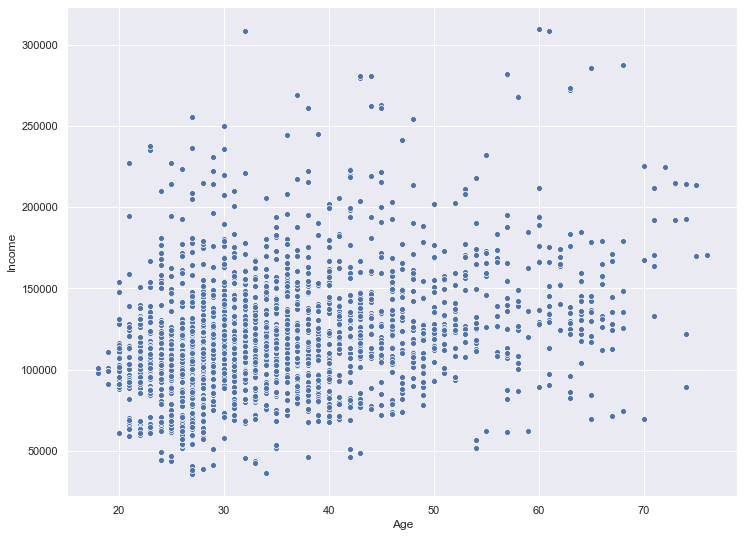

In [9]:
fig = plt.figure(figsize=(12,9))
sns.scatterplot(x='Age', y='Income', data=df)

In [10]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [11]:
# Heirarchical Clustering

In [12]:
# returns a linkage matrix
# distance between clusters should be maximum so we use a ward method
hier_clust = linkage(df_std, method='ward')

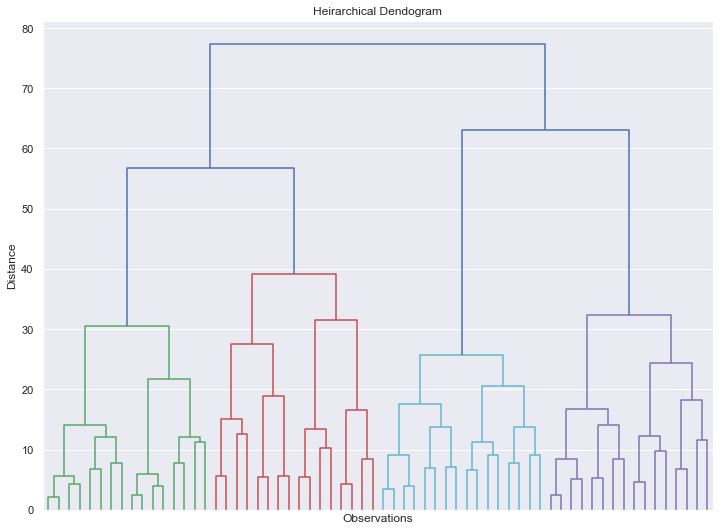

In [13]:
# Represent linkage matrix as a dendogram
plt.figure(figsize=(12,9))
plt.title('Heirarchical Dendogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendogram = dendrogram(hier_clust, truncate_mode='level', p=5, show_leaf_counts=False, no_labels=True)

In [14]:
wcss= []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

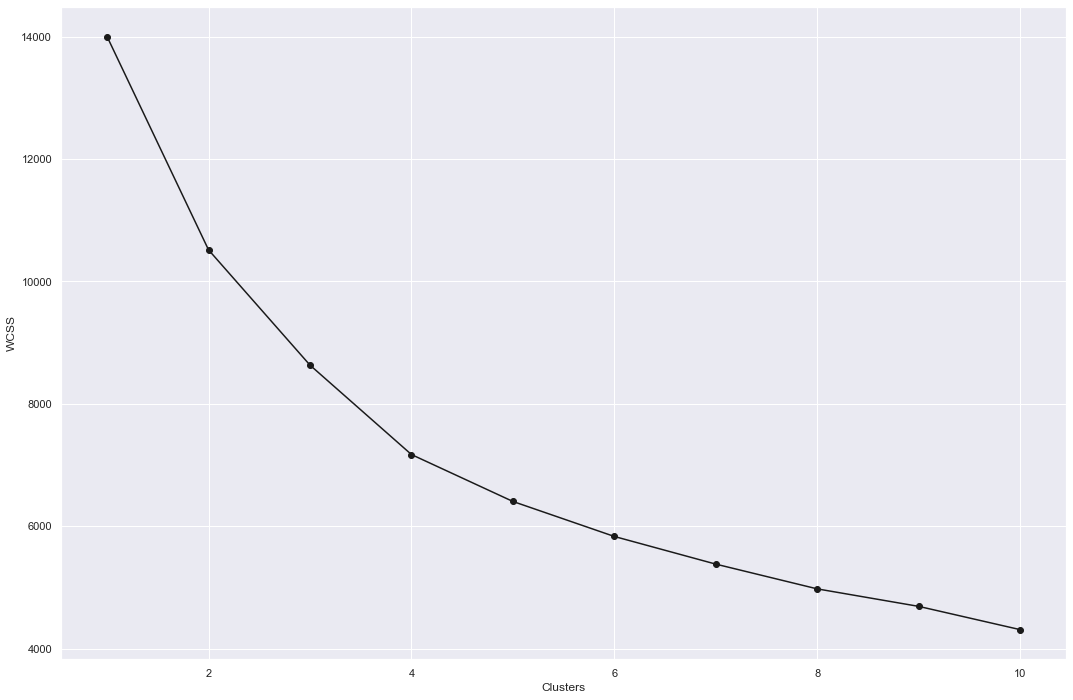

In [15]:
plt.figure(figsize=(18, 12))
plt.plot(range(1,11), wcss, color='k', marker='o')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

In [16]:
# Clearly an elbow is formed when number of clusters are 4 hence we will choose 4 as the optimum number of clusters

In [17]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(df_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [18]:
df_kmeans = df.copy()

In [19]:
df_kmeans['Segment K-means'] = kmeans.labels_

In [20]:
df_seg_analysis = df_kmeans.groupby(['Segment K-means']).mean()

In [21]:
df_seg_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [22]:
df_seg_analysis['count'] = df_kmeans.loc[:, ['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()

In [23]:
df_seg_analysis['prop_obs'] = df_seg_analysis['count']/df_seg_analysis['count'].sum()

In [24]:
df_seg_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,count,prop_obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [25]:
df_seg_analysis.rename({0:'well-off', 1:'fewer-opportunities', 2:'career-focussed', 3:'standard'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,count,prop_obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
career-focussed,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [26]:
df_kmeans['labels'] = df_kmeans['Segment K-means'].map({0:'well-off', 1:'fewer-opportunities', 2:'career-focussed', 
                                                        3:'standard'})                                                      

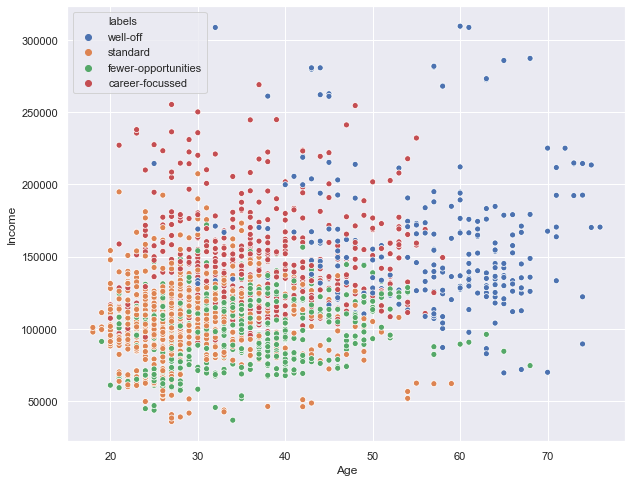

In [27]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='Income', hue='labels', data=df_kmeans)

In [28]:
pca = PCA()
pca.fit(df_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
#PCA components = PCA features
# components are arranged in order of importance
# How much variance of the data is explained by each component

In [30]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

In [31]:
# find a subset of components while preserving as much info as possible
# Rule of thumb keep 80% of the variance

Text(0, 0.5, 'Variance %')

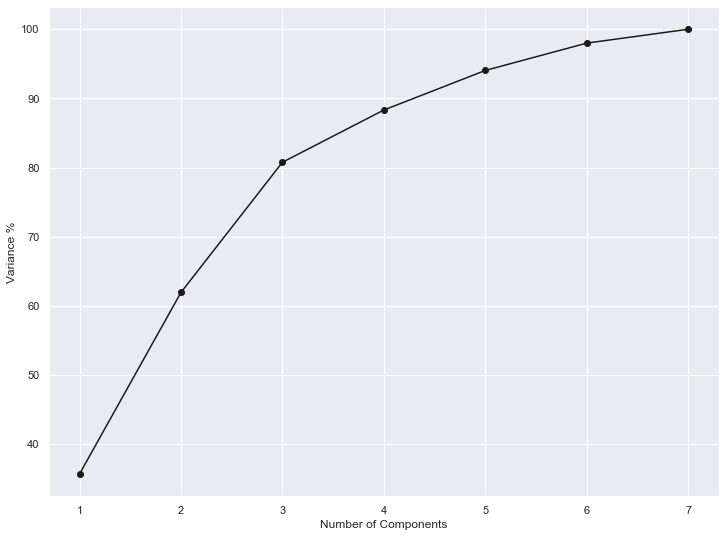

In [32]:
plt.figure(figsize=(12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum()*100, color='k', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')

In [33]:
pca = PCA(n_components=3)
pca.fit(df_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
# Now to check the number of components obtained by PCA
# the values of the components are called as loadings that are correlations between an original variable and a component
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [35]:
df_pca_comp = pd.DataFrame(data=pca.components_, columns=df.columns, index=['Component 1', 'Component 2', 'Component 3'])

In [36]:
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


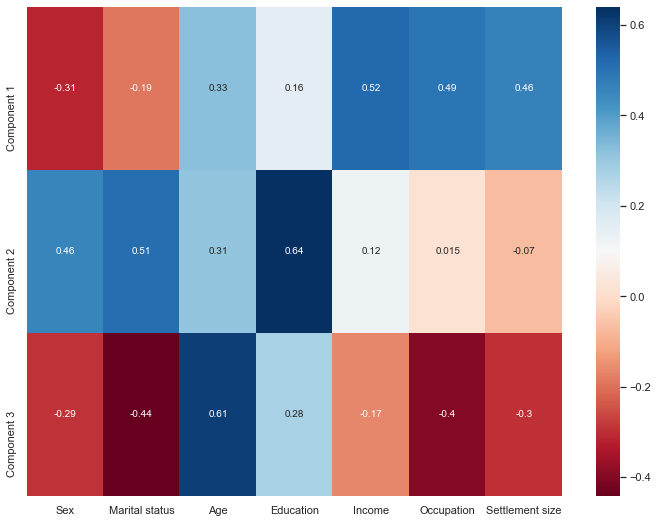

In [37]:
plt.figure(figsize=(12, 9))
sns.heatmap(df_pca_comp, annot=True, cmap='RdBu')

In [38]:
# Component 1 has a positive correlation between Age, Education, Income, Occupation and Settlement size thereby showing 
# overall career focus of a person
# Component 2 reflects an individual's education and lifestyle
# Component 3 reflects Marital Status, Age, Income hence reflecting the experience of a person

In [39]:
# Transforming the data consisting of 7 features into 3 components which are represented by the columns which are called
# pca scores
scores_pca = pca.transform(df_std)

In [40]:
wcss_pca= []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss_pca.append(kmeans_pca.inertia_)

In [41]:
wcss_pca

[11307.571135945916,
 7831.376924840526,
 5954.490285557031,
 4543.102523171212,
 3834.8071569968824,
 3317.518947042474,
 2871.21040855216,
 2563.5103396471354,
 2270.974911003036,
 2009.971709126797]

Text(0, 0.5, 'WCSS')

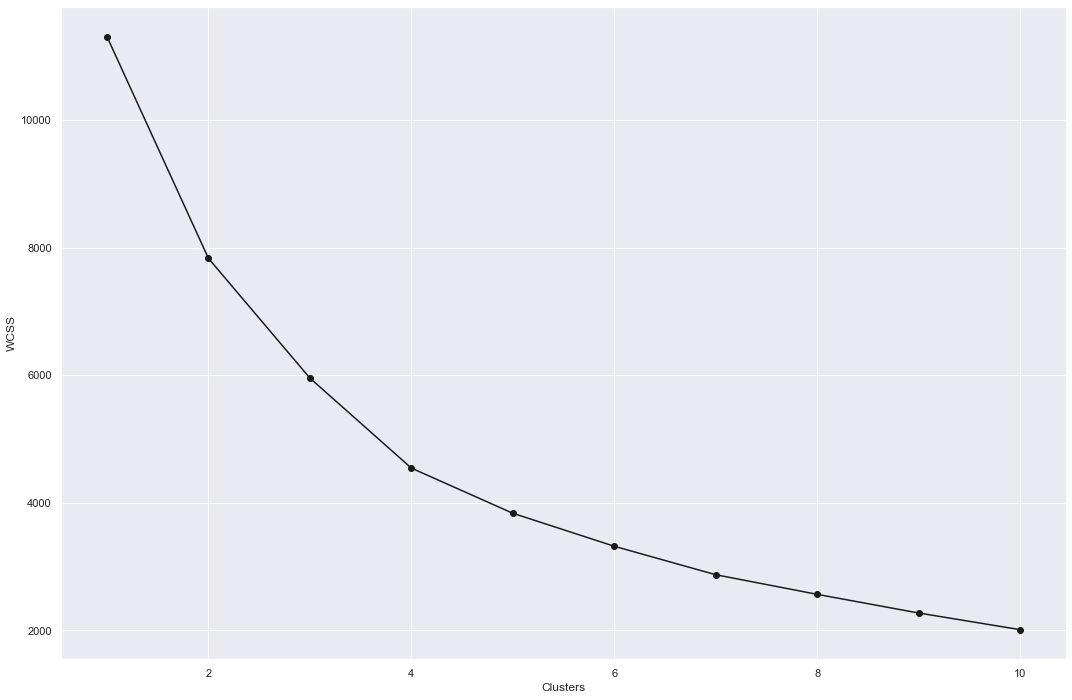

In [42]:
plt.figure(figsize=(18, 12))
plt.plot(range(1,11), wcss_pca, color='k', marker='o')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

In [43]:
kmeans_pca =  KMeans(n_clusters=4, init='k-means++', random_state=42)

In [44]:
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [45]:
df.reset_index(drop=True, inplace=True)

In [46]:
df_pca = pd.concat([df, pd.DataFrame(data=scores_pca, columns=['Component 1', 'Component 2', 'Component 3'] )], axis=1)

In [47]:
df_pca['Segment K-means'] = kmeans_pca.labels_

In [48]:
df_pca.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3


In [49]:
df_pca_analysis = df_pca.groupby(['Segment K-means']).mean()
df_pca_analysis['count'] = df_pca.loc[:, ['Sex', 'Segment K-means']].groupby(['Segment K-means']).count()
df_pca_analysis['prop'] = df_pca_analysis['count']/df_pca_analysis['count'].sum()

In [50]:
df_pca_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,count,prop
Segment K-means,,,,,,,,,,,,
0,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,264,0.1320
1,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493,459,0.2295
2,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925,694,0.3470
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915


In [51]:
# 0 -- > well-off
# 1 -- > Fewer opportunities
# 2 -- > General
# 3 -- > Career focused

In [52]:
df_pca['labels'] = df_pca['Segment K-means'].map({0:'well-off', 1:'fewer-opportunities', 2:'General', 
                                                        3:'Career-focused'})  

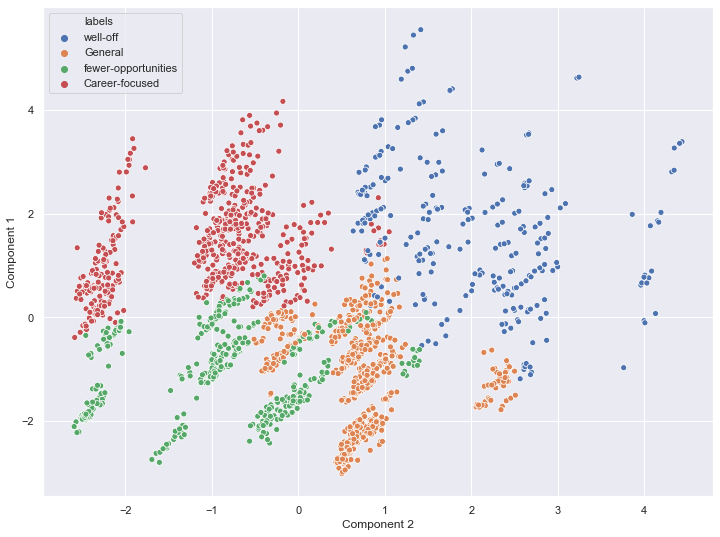

In [53]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='Component 2', y='Component 1', hue='labels', data=df_pca)

# Exporting Data

In [54]:
#pickle is a python module used to turn the python objects into string streams

In [55]:
pickle.dump(scaler, open('scaler.pickle', 'wb'))
pickle.dump(pca, open('pca.pickle', 'wb'))
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))

In [56]:
kmeans.labels_

array([0, 3, 1, ..., 1, 3, 1])